In [50]:
# dynamic z-score for anomaly detection
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import os

In [51]:
df = pd.read_csv('../../data/m16_cpu_usage_v2_10minutes.csv')

In [52]:
df['time'] = pd.to_datetime(df['time'])

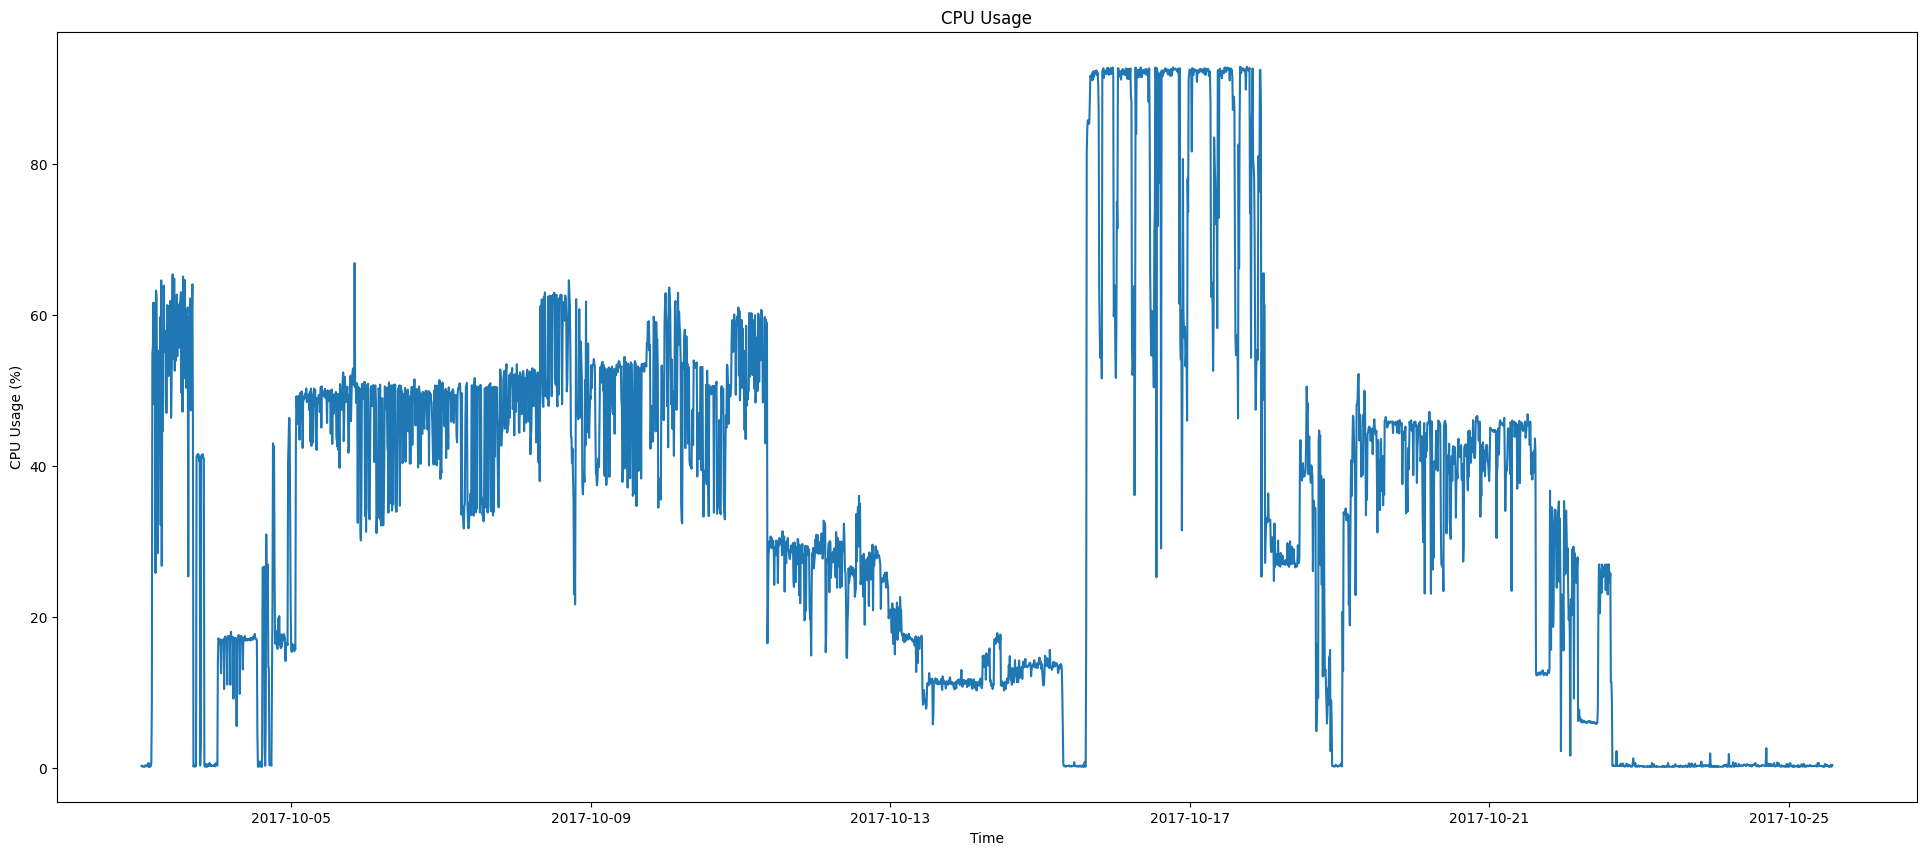

In [53]:
#plot data
plt.figure(figsize=(24, 10))
plt.plot(df['time'], df['cpu_util'])
plt.title('CPU Usage')
plt.ylabel('CPU Usage (%)')
plt.xlabel('Time')
plt.show()

In [54]:
#calculate mean and standard deviation
mean = df['cpu_util'].mean()
std = df['cpu_util'].std()
print('mean: ', mean)
print('std: ', std)


mean:  34.57705015882521
std:  25.44840197848539


In [55]:
# calculate dynamic threshold based on mean and standard deviation
def dynamic_threshold(df, mean, std, k):
    df['z_score'] = (df['cpu_util'] - mean) / std
    df['threshold'] = k * std
    df['anomaly'] = df['cpu_util'] > df['threshold']
    return df

In [56]:
df = dynamic_threshold(df, mean, std, 3)
df.head()

,time,machine_id,cpu_util,z_score,threshold,anomaly
0,2017-10-03 00:00:00,m16,0.300000,-1.346923,76.345206,False
1,2017-10-03 00:10:00,m16,0.340000,-1.345352,76.345206,False
2,2017-10-03 00:20:00,m16,0.253333,-1.348757,76.345206,False
3,2017-10-03 00:30:00,m16,0.200000,-1.350853,76.345206,False
4,2017-10-03 00:40:00,m16,0.200000,-1.350853,76.345206,False
